<a href="https://colab.research.google.com/github/mmrepos/Genetic_Sequence_Analysis_Using_Deep_Neural_Networks/blob/main/Genetic_Sequence_Analysis_Using_Deep_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
#####################################################################################################################
#
#   Genetic sequence analysis using deep neural network analysis
#
#####################################################################################################################

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import (
    LabelBinarizer,
    LabelEncoder,
    OrdinalEncoder,
    MinMaxScaler,
)
from sklearn.model_selection import (
    StratifiedShuffleSplit,
    train_test_split,
    GridSearchCV,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    classification_report,
    precision_score,
    f1_score,
    roc_auc_score,
)
from sklearn.preprocessing import (
    LabelBinarizer,
    LabelEncoder,
    OrdinalEncoder,
    MinMaxScaler,
)
from sklearn.model_selection import (
    StratifiedShuffleSplit,
    train_test_split,
    GridSearchCV,
)
import warnings
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore", module="sklearn")
warnings.filterwarnings("ignore", module="IPython")


In [103]:
# Load the clinvar_conflicting.csv files and assign the variable name dataFile
dataFile = pd.read_csv(
    f"https://raw.githubusercontent.com/mmrepos/"
    "Genetic_Sequence_Analysis_Using_DNN/main/"
    "Dataset/clinvar_conflicting.csv"
)
# Inspect the first ten records in the DataFrame
dataFile.head(10)

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,...,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,1168180,G,C,0.0771,0.10020,0.1066,MedGen:CN169374,NaN,not_specified,...,tolerated,benign,NaN,NaN,NaN,NaN,NaN,1.053,-0.208682,2.0
1,1,1470752,G,A,0.0000,0.00000,0.0000,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",NaN,Spinocerebellar_ataxia_21|not_provided,...,deleterious_low_confidence,benign,NaN,NaN,NaN,NaN,NaN,31.000,6.517838,-3.0
2,1,1737942,A,G,0.0000,0.00001,0.0000,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",NaN,Strabismus|Nystagmus|Hypothyroidism|Intellectu...,...,deleterious,probably_damaging,NaN,NaN,NaN,NaN,NaN,28.100,6.061752,-1.0
3,1,2160305,G,A,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.500,3.114491,NaN
4,1,2160305,G,T,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",NaN,Shprintzen-Goldberg_syndrome,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0
5,1,2160554,G,C,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.700,4.079099,-2.0
6,1,3328358,T,C,0.0000,0.00000,0.0000,MedGen:CN169374,NaN,not_specified,...,NaN,NaN,NaN,NaN,NaN,NaN,0.101,0.172,-0.543433,-1.0
7,1,3328659,C,T,0.1523,0.13103,0.1060,MedGen:CN169374,NaN,not_specified,...,NaN,NaN,NaN,NaN,NaN,NaN,0.101,23.000,3.424422,-3.0
8,1,3347452,G,A,0.0000,0.00357,0.0030,"MedGen:C3809288,OMIM:615373|MedGen:CN169374|Me...",NaN,Left_ventricular_noncompaction_8|not_specified...,...,NaN,NaN,NaN,NaN,NaN,NaN,0.101,11.360,1.126629,1.0
9,1,5925304,G,A,0.0045,0.00231,0.0058,"MedGen:C0687120,Orphanet:ORPHA655,SNOMED_CT:20...",NaN,Nephronophthisis|not_specified,...,deleterious,benign,NaN,NaN,NaN,NaN,0.021,22.100,2.969650,-1.0


In [104]:
dataFile.shape

(65188, 46)

In [105]:
dataFile.CLASS.value_counts()

0    48754
1    16434
Name: CLASS, dtype: int64

In [106]:
# get unique values of a column in a Pandas dataframe
pd.DataFrame(
    [[i, len(dataFile[i].unique())] for i in dataFile.columns],
    columns=["Variable", "Unique Values"],
).set_index("Variable")


,Unique Values
Variable,
CHROM,38
POS,63115
REF,866
ALT,458
AF_ESP,2842
AF_EXAC,6667
AF_TGP,2087
CLNDISDB,9234
CLNDISDBINCL,94


In [107]:
#
unique_columns = pd.DataFrame(
    [[i, len(dataFile[i].unique())] for i in dataFile.columns],
    columns=["Variable", "Unique Values"],
).set_index("Variable")
to_drop = list(unique_columns[unique_columns["Unique Values"] > 3000].index)
dataFile.drop(to_drop, axis=1, inplace=True)

In [108]:
pd.DataFrame(
    [[i, len(dataFile[i].unique())] for i in dataFile.columns],
    columns=["Variable", "Unique Values"],
).set_index("Variable")


,Unique Values
Variable,
CHROM,38
REF,866
ALT,458
AF_ESP,2842
AF_TGP,2087
CLNDISDBINCL,94
CLNDNINCL,102
CLNSIGINCL,138
CLNVC,7


In [109]:
# Check and manage NULL values in the data frame.

number_missing = dataFile.isnull().sum()
percentage_missing = (
    dataFile.isnull().sum().apply(lambda x: x / dataFile.shape[0] * 100)
)

In [110]:
data_missing = pd.DataFrame(
    {"Number Missing": number_missing, "Percentage Missing": percentage_missing}
)

# Percentage of missing data in the dataframe in descending order

data_missing["Percentage Missing"].sort_values(ascending=False)


MOTIF_NAME            99.996932
MOTIF_SCORE_CHANGE    99.996932
HIGH_INF_POS          99.996932
MOTIF_POS             99.996932
DISTANCE              99.834325
SSR                   99.800577
CLNDISDBINCL          99.743818
CLNDNINCL             99.743818
CLNSIGINCL            99.743818
INTRON                86.495981
PolyPhen              61.962324
SIFT                  61.900963
BLOSUM62              60.739707
BAM_EDIT              50.958765
Amino_acids           15.346383
Codons                15.346383
LoFtool                6.462846
MC                     1.297785
SYMBOL                 0.024544
BIOTYPE                0.024544
STRAND                 0.021476
Feature_type           0.021476
Feature                0.021476
REF                    0.000000
IMPACT                 0.000000
Consequence            0.000000
Allele                 0.000000
CLASS                  0.000000
ORIGIN                 0.000000
CLNVC                  0.000000
AF_TGP                 0.000000
AF_ESP  

In [111]:
# Drop the columns where >= 20% of the data is missing

list_to_drop = list(data_missing[data_missing["Percentage Missing"] >= 20].index)
dataFile.drop(list_to_drop, axis=1, inplace=True)

# Check the NULL values in a data frame.

dataFile.isnull().sum()

CHROM               0
REF                 0
ALT                 0
AF_ESP              0
AF_TGP              0
CLNVC               0
MC                846
ORIGIN              0
CLASS               0
Allele              0
Consequence         0
IMPACT              0
SYMBOL             16
Feature_type       14
Feature            14
BIOTYPE            16
Amino_acids     10004
Codons          10004
STRAND             14
LoFtool          4213
dtype: int64

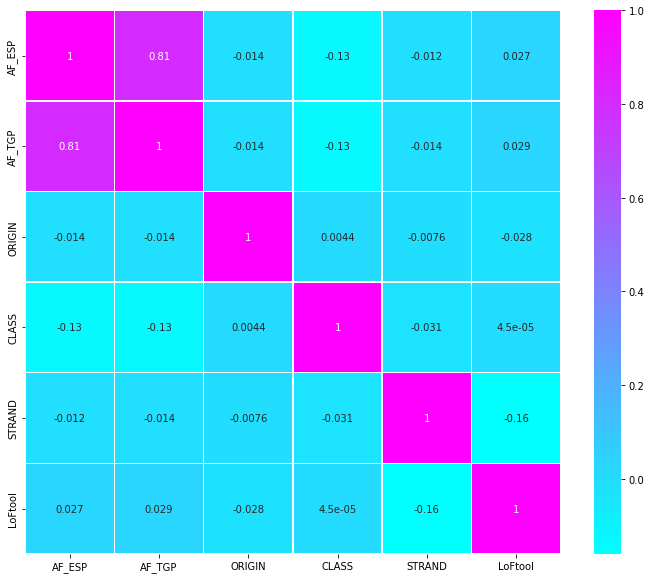

In [112]:
# Create a new figure with the specified width and height
# Display dataFrame as heatmap

plt.figure(figsize=(12, 10))
sns.heatmap(dataFile.corr(), annot=True, linewidths=0.5, cmap=plt.cm.cool)

In [113]:
# Drop the AF_TGP column that is strongly correlated
# Correlation for AF_ESP with AF_TGP is above 0.8

dataFile.drop(["AF_TGP"], axis=1, inplace=True)

In [114]:
# Return the data type of each column in the DataFrame
# count the number of missing values instead.
# dataFile.isnull().sum() returns the number of missing values for each column

df_data = pd.DataFrame(dataFile.isnull().sum().astype(int), columns=["Null"])
nullList = list(df_data[df_data["Null"] != 0].index)
dataFile[nullList].dtypes

MC               object
SYMBOL           object
Feature_type     object
Feature          object
BIOTYPE          object
Amino_acids      object
Codons           object
STRAND          float64
LoFtool         float64
dtype: object

In [115]:
# Feature Transformation
# Replace nan with most frequent value in these columns
# Columns: MC, SYMBOL, Feature_type, Feature, BIOTYPE, Amino_acids, Codons, STRAND

for x in [
    'MC',
    'SYMBOL',
    'Feature_type',
    'Feature',
    'BIOTYPE',
    'STRAND',
    'Amino_acids',
    'Codons',
    ]:
    dataFile[x].fillna(dataFile[x].mode()[0], inplace=True)

# Replace the nan value in LoFtool column with mean

dataFile['LoFtool'].fillna(dataFile['LoFtool'].mean(), inplace=True)

# check NULL values in a data frame

dataFile.isnull().sum()

CHROM           0
REF             0
ALT             0
AF_ESP          0
CLNVC           0
MC              0
ORIGIN          0
CLASS           0
Allele          0
Consequence     0
IMPACT          0
SYMBOL          0
Feature_type    0
Feature         0
BIOTYPE         0
Amino_acids     0
Codons          0
STRAND          0
LoFtool         0
dtype: int64

In [116]:
# Look at the number of unique values each variable takes, and then create
# and then create list variables for numeric, binary, categorical, and ordinal variables.

dt = pd.DataFrame(
    [[str(i), dataFile[i].dtypes == "object"] for i in dataFile.columns],
    columns=["Variable", "Object Type"],
).set_index("Variable")
columns_object_type = list(dt[dt["Object Type"] == True].index)

In [117]:
# Unique value on each column in dataframe

df_data = dataFile[columns_object_type]
df_unique_values = pd.DataFrame(
    [[i, len(df_data[i].unique())] for i in df_data.columns],
    columns=["Variable", "Unique Values"],
).set_index("Variable")
df_unique_values

,Unique Values
Variable,
CHROM,38
REF,866
ALT,458
CLNVC,7
MC,90
Allele,374
Consequence,48
IMPACT,4
SYMBOL,2328


In [118]:
# Check which variables are binary

variables_bin = list(df_unique_values[df_unique_values["Unique Values"] == 2].index)
variables_bin

['Feature_type', 'BIOTYPE']

In [119]:
# Check which variables are categorical

variables_categorical = list(
    df_unique_values[df_unique_values["Unique Values"] > 2].index
)
variables_categorical

['CHROM',
 'REF',
 'ALT',
 'CLNVC',
 'MC',
 'Allele',
 'Consequence',
 'IMPACT',
 'SYMBOL',
 'Feature',
 'Amino_acids',
 'Codons']

In [120]:
# Apply function with lambda along the row

for col in variables_categorical:
    dataFile[col] = dataFile[col].apply(lambda x: str(x))

dataFile[variables_categorical].dtypes

CHROM          object
REF            object
ALT            object
CLNVC          object
MC             object
Allele         object
Consequence    object
IMPACT         object
SYMBOL         object
Feature        object
Amino_acids    object
Codons         object
dtype: object

In [121]:
# numeric

variables_numeric = list(
    set(dataFile.columns) - set(variables_categorical) - set(variables_bin)
)
dataFile[variables_numeric].dtypes

CLASS        int64
LoFtool    float64
STRAND     float64
AF_ESP     float64
ORIGIN       int64
dtype: object

In [122]:
# LabelBinarizer makes this process easy with the transform method.
# Accepts Categorical data as input and returns an Numpy array.
# Encode target labels with value between 0 and n_classes-1.
# To encode target values, i.e. y , and not the input X

(lb, le) = (LabelBinarizer(), LabelEncoder())

# Encode target labels ordinary variables

for col in variables_categorical:
    dataFile[col] = le.fit_transform(dataFile[col])

# Encode target labels ordinary variables encoding binary variables

for col in variables_bin:
    dataFile[col] = lb.fit_transform(dataFile[col])

dataFile.sample(5)

,CHROM,REF,ALT,AF_ESP,CLNVC,MC,ORIGIN,CLASS,Allele,Consequence,IMPACT,SYMBOL,Feature_type,Feature,BIOTYPE,Amino_acids,Codons,STRAND,LoFtool
64846,23,224,335,0.0000,6,81,1,0,296,31,1,1149,1,662,1,78,1163,-1.0,0.01810
55494,18,437,0,0.0000,6,89,1,0,1,46,1,1591,1,1726,1,333,2183,-1.0,0.00772
64045,23,224,0,0.0000,6,81,1,0,1,31,1,223,1,2327,1,78,1163,-1.0,0.06270
5798,13,224,335,0.2253,6,19,1,0,296,17,2,1516,1,2150,1,756,1143,1.0,0.89800
32024,8,0,106,0.0000,6,19,1,0,88,17,2,249,1,1642,1,972,619,-1.0,0.64000


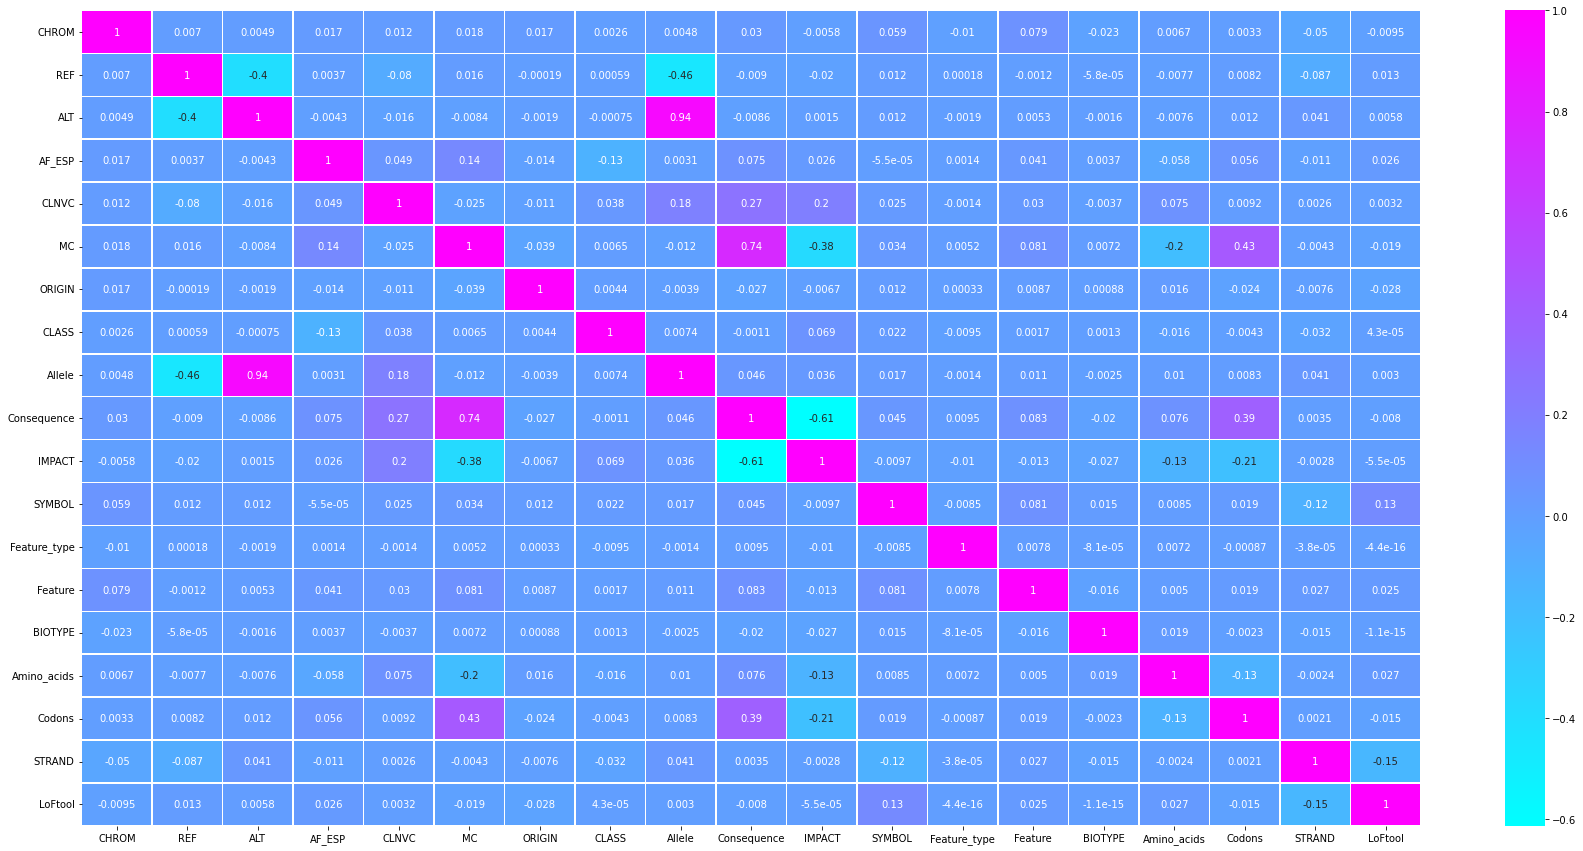

In [123]:
# Display dataFrame as heatmap

plt.figure(figsize=(30, 15))
sns.heatmap(dataFile.corr(), annot=True, linewidths=0.5, cmap=plt.cm.cool)

In [124]:
# Drop the ALT and MC columns that are strongly correlated
# Correlation for Allele with ALT and Consequence with MC are above 0.8

dataFile.drop(["ALT", "MC"], axis=1, inplace=True)
variables_categorical.remove("ALT")
variables_categorical.remove("MC")

In [125]:
# Transform features by scaling each feature to a given range.
# The default range for the feature returned by MinMaxScaler is 0 to 1.

mm = MinMaxScaler()
for column in [variables_categorical + variables_numeric]:
    dataFile[column] = mm.fit_transform(dataFile[column])

In [126]:
feature_columns = list(dataFile.columns)
feature_columns.remove('CLASS')

# **Split the data**



*   Split the data into train and test data sets using StratifiedShuffleSplit to maintain the same ratio of predictor classes.




In [141]:
# Split the data into test and train data sets
# Using StratifiedShuffleSplit so proportion of distribution of
# class labels is almost even between train and test dataset.

# Using StratifiedShuffleSplit() to get the split indexes

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

(train_index, test_index) = next(sss.split(dataFile[feature_columns], dataFile.CLASS))

# Creating dataframes

X_train = dataFile.loc[train_index, feature_columns]
y_train = dataFile.loc[train_index, "CLASS"]

X_test = dataFile.loc[test_index, feature_columns]
y_test = dataFile.loc[test_index, "CLASS"]
(len(X_test), len(X_train))

(19557, 45631)

In [140]:
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (45631, 16)
Y_train: (45631,)
X_test:  (19557, 16)
Y_test:  (19557,)


In [130]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Train models**


*   Standard logistic regression, K-nearest neighbors algorithm, Decision Tree,mRandom Forest
*   Plot the results using heatmaps
*   Compare scores: precision, recall, accuracy, F1 score, auc



# **Logistic Regression**

In [143]:
# create dataframe for metrics
metrics = pd.DataFrame()

# Standard logistic regression
lr = LogisticRegression(solver="liblinear").fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

precision_lr, recall_lr = (
    round(float(x), 2) for x in list(score(y_test, y_pred_lr, average="weighted"))[:-2]
)
# adding lr stats to metrics DataFrame
lr_stats = pd.Series(
    {
        "precision": precision_lr,
        "recall": recall_lr,
        "accuracy": round(accuracy_score(y_test, y_pred_lr), 2),
        "f1score": round(f1_score(y_test, y_pred_lr), 2),
        "auc": round(roc_auc_score(y_test, y_pred_lr), 2),
    },
    name="Logistic Regression",
)
# Report outcomes
pd.DataFrame(classification_report(y_test, y_pred_lr, output_dict=True)).iloc[:3, :2]

,0.0,1.0
precision,0.747773,0.130435
recall,0.998633,0.000609
f1-score,0.855186,0.001211


# **K-nearest Neighbors**

In [144]:
# Estimate KNN model and report outcomes
knn = KNeighborsClassifier(n_neighbors=3, weights="distance")
knn = knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

precision_knn, recall_knn = (
    round(float(x), 2) for x in list(score(y_test, y_pred_knn, average="weighted"))[:-2]
)
# adding KNN stats to metrics DataFrame
knn_stats = pd.Series(
    {
        "precision": precision_knn,
        "recall": recall_knn,
        "accuracy": round(accuracy_score(y_test, y_pred_knn), 2),
        "f1score": round(f1_score(y_test, y_pred_knn), 2),
        "auc": round(roc_auc_score(y_test, y_pred_knn), 2),
    },
    name="KNN",
)
# Report outcomes
pd.DataFrame(classification_report(y_test, y_pred_knn, output_dict=True)).iloc[:3, :2]


,0.0,1.0
precision,0.772539,0.345691
recall,0.817803,0.285598
f1-score,0.794527,0.312785


# **Decision Tree**

In [145]:
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)
dt.tree_.node_count, dt.tree_.max_depth

(21179, 44)

In [146]:
y_train_pred = dt.predict(X_train)
y_pred_dt = dt.predict(X_test)

precision_dt, recall_dt = (
    round(float(x), 2) for x in list(score(y_test, y_pred_dt, average="weighted"))[:-2]
)
# adding dt stats to metrics DataFrame
dt_stats = pd.Series(
    {
        "precision": precision_dt,
        "recall": recall_dt,
        "accuracy": round(accuracy_score(y_test, y_pred_dt), 2),
        "f1score": round(f1_score(y_test, y_pred_dt), 2),
        "auc": round(roc_auc_score(y_test, y_pred_dt), 2),
    },
    name="Decision Tree",
)
# Report outcomes
pd.DataFrame(classification_report(y_test, y_pred_dt, output_dict=True)).iloc[:3, :2]

,0.0,1.0
precision,0.788235,0.381372
recall,0.803377,0.359635
f1-score,0.795734,0.370185


# **Random forest**

In [147]:
# Initialize the random forest estimator
RF = RandomForestClassifier(oob_score=True, random_state=42, warm_start=True, n_jobs=-1)

# initialise list for out of bag error
oob_list = list()

# Iterate through all of the possibilities for number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:

    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the out of bag error and store it
    oob_error = 1 - RF.oob_score_
    oob_list.append(pd.Series({"n_trees": n_trees, "oob": oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index("n_trees")


[Text(0, 0.5, 'out-of-bag error')]

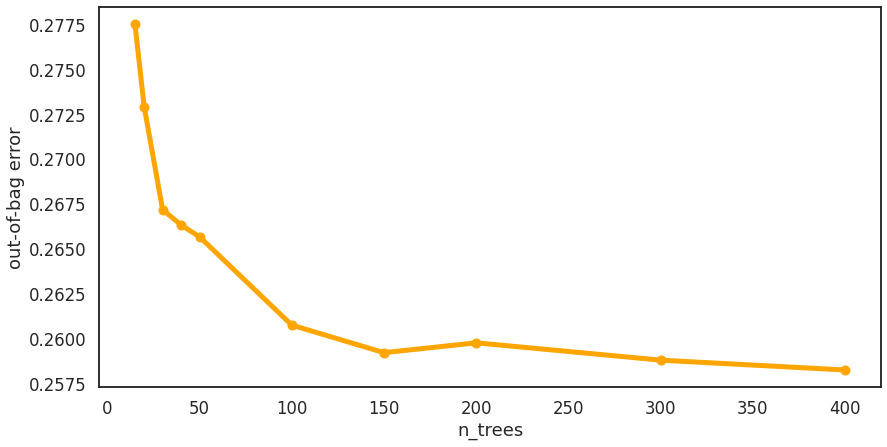

In [148]:
sns.set_context("talk")
sns.set_style("white")

ax = rf_oob_df.plot(
    legend=False, marker="o", color="orange", figsize=(14, 7), linewidth=5
)
ax.set(ylabel="out-of-bag error")

In [149]:
rf = RF.set_params(n_estimators=100)

y_pred_rf = rf.predict(X_test)
precision_rf, recall_rf = (
    round(float(x), 2) for x in list(score(y_test, y_pred_rf, average="weighted"))[:-2]
)
rf_stats = pd.Series(
    {
        "precision": precision_rf,
        "recall": recall_rf,
        "accuracy": round(accuracy_score(y_test, y_pred_rf), 2),
        "f1score": round(f1_score(y_test, y_pred_rf), 2),
        "auc": round(roc_auc_score(y_test, y_pred_rf), 2),
    },
    name="Random Forest",
)
# Report outcomes
pd.DataFrame(classification_report(y_test, y_pred_rf, output_dict=True)).iloc[:3, :2]


,0.0,1.0
precision,0.785655,0.484793
recall,0.903876,0.268357
f1-score,0.840629,0.345476


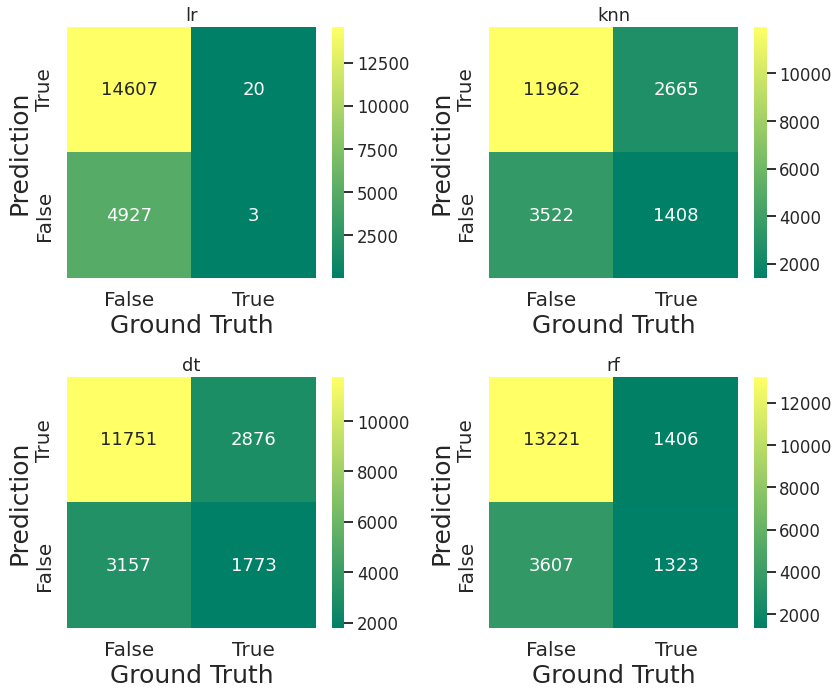

In [150]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)


models = coeff_labels = ["lr", "knn", "dt", "rf"]
cm = [
    confusion_matrix(y_test, y_pred_lr),
    confusion_matrix(y_test, y_pred_knn),
    confusion_matrix(y_test, y_pred_dt),
    confusion_matrix(y_test, y_pred_rf),
]
labels = ["False", "True"]

for ax, model, idx in zip(axList, models, range(0, 4)):
    sns.heatmap(cm[idx], ax=ax, annot=True, fmt="d", cmap="summer")
    ax.set(title=model)
    ax.set_xticklabels(labels, fontsize=20)
    ax.set_yticklabels(labels[::-1], fontsize=20)
    ax.set_ylabel("Prediction", fontsize=25)
    ax.set_xlabel("Ground Truth", fontsize=25)

plt.tight_layout()


In [151]:
pd.DataFrame(classification_report(y_test, y_pred_lr, output_dict=True)).iloc[:3,:2]

,0.0,1.0
precision,0.747773,0.130435
recall,0.998633,0.000609
f1-score,0.855186,0.001211


In [152]:
pd.DataFrame(classification_report(y_test, y_pred_knn, output_dict=True)).iloc[:3,:2]

,0.0,1.0
precision,0.772539,0.345691
recall,0.817803,0.285598
f1-score,0.794527,0.312785


In [153]:
pd.DataFrame(classification_report(y_test, y_pred_dt, output_dict=True)).iloc[:3,:2]

,0.0,1.0
precision,0.788235,0.381372
recall,0.803377,0.359635
f1-score,0.795734,0.370185


In [154]:
pd.DataFrame(classification_report(y_test, y_pred_rf, output_dict=True)).iloc[:3,:2]

,0.0,1.0
precision,0.785655,0.484793
recall,0.903876,0.268357
f1-score,0.840629,0.345476


The classsification report for each classifier show:


*   Predict consistent classification, with an F1 score of 0.855186 for **Logistic Regression** model.
*   Similar result achieved using any of the model above.
*   Predicted conflicting classification with F2 score 0.370185 with **Decision Tree** algorithm which is significantly better than the **Logistic Regression** with F1 score 0.001211.




Large amount of misclassification can be seen on the average error report below.

In [155]:
metrics.append([lr_stats, knn_stats, dt_stats, rf_stats])

,precision,recall,accuracy,f1score,auc
Logistic Regression,0.59,0.75,0.75,0.00,0.50
KNN,0.66,0.68,0.68,0.31,0.55
Decision Tree,0.69,0.69,0.69,0.37,0.58
Random Forest,0.71,0.74,0.74,0.35,0.59
